### Namaster - pymaster 

https://namaster.readthedocs.io/en/latest/pymaster.html

Many of these function accept or return sets of power spectra (arrays with one element per angular multipole) or bandpowers (binned versions of power spectra). In all cases, these are returned and provided as 2D arrays with shape [n_cls][nl], where n_cls is the number of power spectra and nl is either the number of multipoles or bandpowers. In all cases, n_cls should correspond with the spins of the two fields being correlated, and the ordering is as follows:

    Two spin-0 fields: n_cls=1, [C_T1T2]
    One spin-0 field and one spin-2 field: n_cls=2, [C_TE,C_TB]
    Two spin-2 fields: n_cls=4, [C_E1E2,C_E1B2,C_E2B1,C_B1B2]

All sky maps accepted and returned by these functions are in the form of HEALPix maps exclusively with RING ordering.

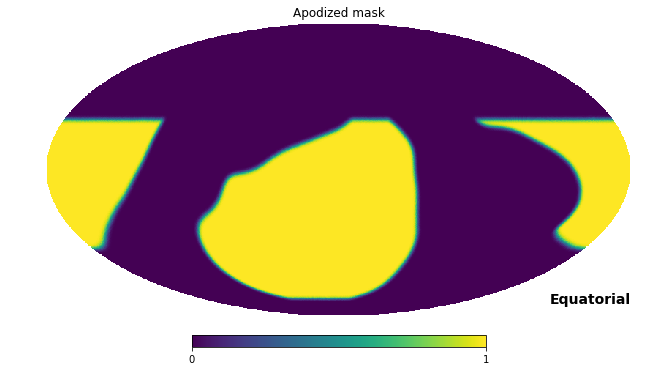

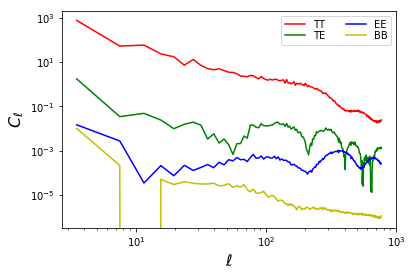

In [18]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Import the NaMaster python wrapper
import pymaster as nmt

#  Simple example showcasing the use of NaMaster to compute the pseudo-Cl
#  estimator of the angular cross-power spectrum of a spin-0 field and a
#  spin-2 field

# HEALPix resolution parameter used here
nside = 256

# Read mask and apodize it on a scale of ~1deg
mask = nmt.mask_apodization(hp.read_map("mask.fits", verbose=False),
                            1., apotype="Smooth")
hp.mollview(mask, coord=['G', 'C'], title='Apodized mask')
plt.show()

# Read healpix maps and initialize a spin-0 and spin-2 field
f_0 = nmt.NmtField(mask, [hp.read_map("maps.fits", field=0, verbose=False)])
f_2 = nmt.NmtField(mask, hp.read_map("maps.fits", field=[1, 2], verbose=False))

# Initialize binning scheme with 4 ells per bandpower
#b = nmt.NmtBin.from_nside_linear(nside, 4)

#nlb: how many ell's in each bin:
b= nmt.NmtBin(nside,nlb=4)

# Compute MASTER estimator
# spin-0 x spin-0
cl_00 = nmt.compute_full_master(f_0, f_0, b)
# spin-0 x spin-2
cl_02 = nmt.compute_full_master(f_0, f_2, b)
# spin-2 x spin-2
cl_22 = nmt.compute_full_master(f_2, f_2, b)




# Plot results
ell_arr = b.get_effective_ells()
plt.plot(ell_arr, cl_00[0], 'r-', label='TT')
plt.plot(ell_arr, np.fabs(cl_02[0]), 'g-', label='TE')
plt.plot(ell_arr, cl_22[0], 'b-', label='EE')
plt.plot(ell_arr, cl_22[3], 'y-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()



Signature: nmt.compute_coupled_cell(f1, f2)
Docstring:
Computes the full-sky angular power spectra of two masked fields     (f1 and f2) without aiming to deconvolve the mode-coupling matrix.     Effectively, this is equivalent to calling the usual HEALPix     anafast routine on the masked and contaminant-cleaned maps.

:param NmtField f1,f2: fields to correlate
:return: array of coupled power spectra
File:      ~/miniconda3/envs/qubic_env/lib/python3.6/site-packages/pymaster/workspaces.py
Type:      function


In [33]:
def compute_master(f_a, f_b, wsp):
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    cl_decoupled = wsp.decouple_cell(cl_coupled)
    return cl_decoupled


nmt.NmtWorkspace.decouple_cell?

Signature: nmt.NmtWorkspace.decouple_cell(self, cl_in, cl_bias=None, cl_noise=None)
Docstring:
Decouples a set of pseudo-Cl power spectra into a set of bandpowers         by inverting the binned coupling matrix (se Eq. 4 of the C API         documentation).

:param cl_in: set of input power spectra. The number of power spectra             must correspond to the spins of the two fields that this             NmtWorkspace object was initialized with (i.e. 1 for two spin-0             fields, 2 for one spin-0 and one spin-2 field, 4 for two spin-2             fields and 7 if this NmtWorkspace was created using `is_teb=True`).

:param cl_bias: bias to the power spectrum associated to contaminant             residuals (optional). This can be computed through             :func:`pymaster.deprojection_bias`.

:param cl_noise: noise bias (i.e. angular power spectrum of masked             noise realizations).

:return: set of decoupled bandpowers
File:      ~/miniconda3/envs/qubic_env/lib/python3.6/site-packages/pymaster/workspaces.py
Type:      function


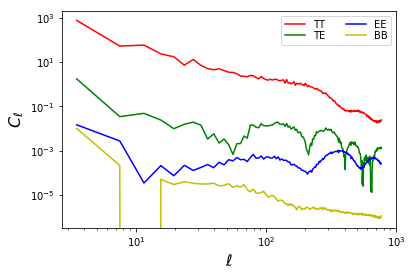

In [36]:

#fth=lth*(lth+1)/(2*np.pi)



# Plot results
ell_arr = b.get_effective_ells()
plt.plot(ell_arr, cl_00[0], 'r-', label='TT')
plt.plot(ell_arr, np.fabs(cl_02[0]), 'g-', label='TE')
plt.plot(ell_arr, cl_22[0], 'b-', label='EE')
plt.plot(ell_arr, cl_22[3], 'y-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()


In [29]:
#some testing:
print(ell_arr)
print(len(ell_arr))
print(3*nside-1)
print((3*nside-1)/4)

[  3.5   7.5  11.5  15.5  19.5  23.5  27.5  31.5  35.5  39.5  43.5  47.5
  51.5  55.5  59.5  63.5  67.5  71.5  75.5  79.5  83.5  87.5  91.5  95.5
  99.5 103.5 107.5 111.5 115.5 119.5 123.5 127.5 131.5 135.5 139.5 143.5
 147.5 151.5 155.5 159.5 163.5 167.5 171.5 175.5 179.5 183.5 187.5 191.5
 195.5 199.5 203.5 207.5 211.5 215.5 219.5 223.5 227.5 231.5 235.5 239.5
 243.5 247.5 251.5 255.5 259.5 263.5 267.5 271.5 275.5 279.5 283.5 287.5
 291.5 295.5 299.5 303.5 307.5 311.5 315.5 319.5 323.5 327.5 331.5 335.5
 339.5 343.5 347.5 351.5 355.5 359.5 363.5 367.5 371.5 375.5 379.5 383.5
 387.5 391.5 395.5 399.5 403.5 407.5 411.5 415.5 419.5 423.5 427.5 431.5
 435.5 439.5 443.5 447.5 451.5 455.5 459.5 463.5 467.5 471.5 475.5 479.5
 483.5 487.5 491.5 495.5 499.5 503.5 507.5 511.5 515.5 519.5 523.5 527.5
 531.5 535.5 539.5 543.5 547.5 551.5 555.5 559.5 563.5 567.5 571.5 575.5
 579.5 583.5 587.5 591.5 595.5 599.5 603.5 607.5 611.5 615.5 619.5 623.5
 627.5 631.5 635.5 639.5 643.5 647.5 651.5 655.5 65

In [5]:
import pymaster as nmt

In [12]:
hp.read_map("mask.fits", verbose=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


array([1., 1., 1., ..., 1., 1., 1.])

In [13]:
hp.read_map("maps.fits", verbose=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


array([-50.91341782, -70.7820282 , -73.8384552 , ..., -26.76893044,
       -35.90533829, -46.54039764])

In [23]:
np.fabs?

Init signature:
nmt.NmtBin(
    nside,
    bpws=None,
    ells=None,
    weights=None,
    nlb=None,
    lmax=None,
    is_Dell=False,
    f_ell=None,
)
Docstring:     
An NmtBin object defines the set of bandpowers used in the     computation of the pseudo-Cl estimator. The definition of     bandpowers is described in Section 3.6 of the scientific     documentation.

:param int nside: HEALPix nside resolution parameter of the         maps you intend to correlate. The maximum multipole         considered for bandpowers will be 3*nside-1, unless         `lmax` is set.

:param array-like ells: array of integers corresponding to         different multipoles

:param array-like bpws: array of integers that assign the         multipoles in ells to different bandpowers

:param array-like weights: array of floats corresponding to         the weights associated to each multipole in ells. The sum         of weights within each bandpower is normalized to 1.

:param int nlb: integer value corresponding to a constant         bandpower width. I.e. the bandpowers will be defined as         consecutive sets of nlb multipoles from l=2 to l=lmax (see         below) with equal weights. If this argument is provided,         the values of ells, bpws and weights are ignored.

:param int lmax: integer value corresponding to the maximum         multipole used by these bandpowers. If None, it will be set         to 3*nside-1. In any case the actual maximum multipole will         be chosen as the minimum of lmax, 3*nside-1 and the maximum         element of ells (e.g. if you are using CAR maps and don't         care about nside, you can pass whatever lmax you want and         e.g. nside=lmax).

:param boolean is_Dell: if True, the output of all pseudo-Cl         computations carried out using this bandpower scheme (e.g.         from 

:py:meth:`pymaster.workspaces.NmtWorkspace.decouple_cell`)         will be multiplied by `ell * (ell + 1) / 2 * PI`, where `ell`         is the multipole order (no prefactor otherwise).

:param array-like f_ell: if present, this is array represents an         `ell-dependent` function that will be multiplied by all         pseudo-Cl computations carried out using this bandpower scheme.         If not `None`, the value of `is_Dell` is ignored.

File:           ~/miniconda3/envs/qubic_env/lib/python3.6/site-packages/pymaster/bins.py
Type:           type
Subclasses:     